In [1]:
import pandas as pd

df = pd.read_csv('sample_data/merged_result.csv')

C:\Users\lin\AppData\Local\Temp\ipykernel_4836\54236364.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sample_data/merged_result.csv')


In [2]:
df.columns

Index(['JOB_ID', 'ROLE_PRIMARY_x', 'JOB_FAMILY', 'SUB_JOB_FAMILY',
       'CAREER_STREAM', 'SOC6D', 'SOC6D_TITLE', 'SENIORITY',
       'MODIFY_TIMESTAMP_x', 'VERTICAL', 'COMPANY', 'POST_DATE', 'SALARY',
       'LOCATION', 'CITY', 'STATE', 'STATE_LONG', 'ZIP', 'COUNTY',
       'REGION_STATE', 'LATITUDE', 'LONGITUDE', 'COMPANY_REF',
       'COMPANY_PARENT', 'SIC_PRIMARY', 'NAICS_PRIMARY', 'TICKER',
       'SCRAPE_TIMESTAMP', 'MODIFY_TIMESTAMP_y', 'META_NUM_ROLES',
       'META_NUM_TAGS', 'META_NUM_TITLES', 'SALARY_MODELED', 'ROLE_PRIMARY_y'],
      dtype='object')

In [3]:
na_count = df.isnull().sum()
print(na_count)

JOB_ID                      0
ROLE_PRIMARY_x         140388
JOB_FAMILY            1020811
SUB_JOB_FAMILY        1020811
CAREER_STREAM         1033184
SOC6D                  141715
SOC6D_TITLE            454780
SENIORITY             2842542
MODIFY_TIMESTAMP_x          0
VERTICAL              2842542
COMPANY                    96
POST_DATE                   0
SALARY                 591892
LOCATION                   20
CITY                   525412
STATE                  525412
STATE_LONG             526346
ZIP                    550575
COUNTY                 587725
REGION_STATE           573293
LATITUDE               587269
LONGITUDE              587269
COMPANY_REF            992092
COMPANY_PARENT        1606235
SIC_PRIMARY           1569277
NAICS_PRIMARY         2283152
TICKER                2425892
SCRAPE_TIMESTAMP            0
MODIFY_TIMESTAMP_y          0
META_NUM_ROLES          61603
META_NUM_TAGS            1141
META_NUM_TITLES             0
SALARY_MODELED        2842542
ROLE_PRIMA

In [4]:
df.head(1)

,JOB_ID,ROLE_PRIMARY_x,JOB_FAMILY,SUB_JOB_FAMILY,CAREER_STREAM,SOC6D,SOC6D_TITLE,SENIORITY,MODIFY_TIMESTAMP_x,VERTICAL,...,SIC_PRIMARY,NAICS_PRIMARY,TICKER,SCRAPE_TIMESTAMP,MODIFY_TIMESTAMP_y,META_NUM_ROLES,META_NUM_TAGS,META_NUM_TITLES,SALARY_MODELED,ROLE_PRIMARY_y
0,823218931194536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-31 07:53:49.000,NaN,...,NaN,624410.0,NaN,2024-01-25 05:14:49.000,2024-04-14 02:14:02.000,4.0,53.0,1.0,NaN,NaN


In [5]:
df = df.dropna(subset=['ROLE_PRIMARY_x', 'JOB_FAMILY', 'SUB_JOB_FAMILY', 'CAREER_STREAM', 'SOC6D', 'SOC6D_TITLE', 'SENIORITY'], how='all')

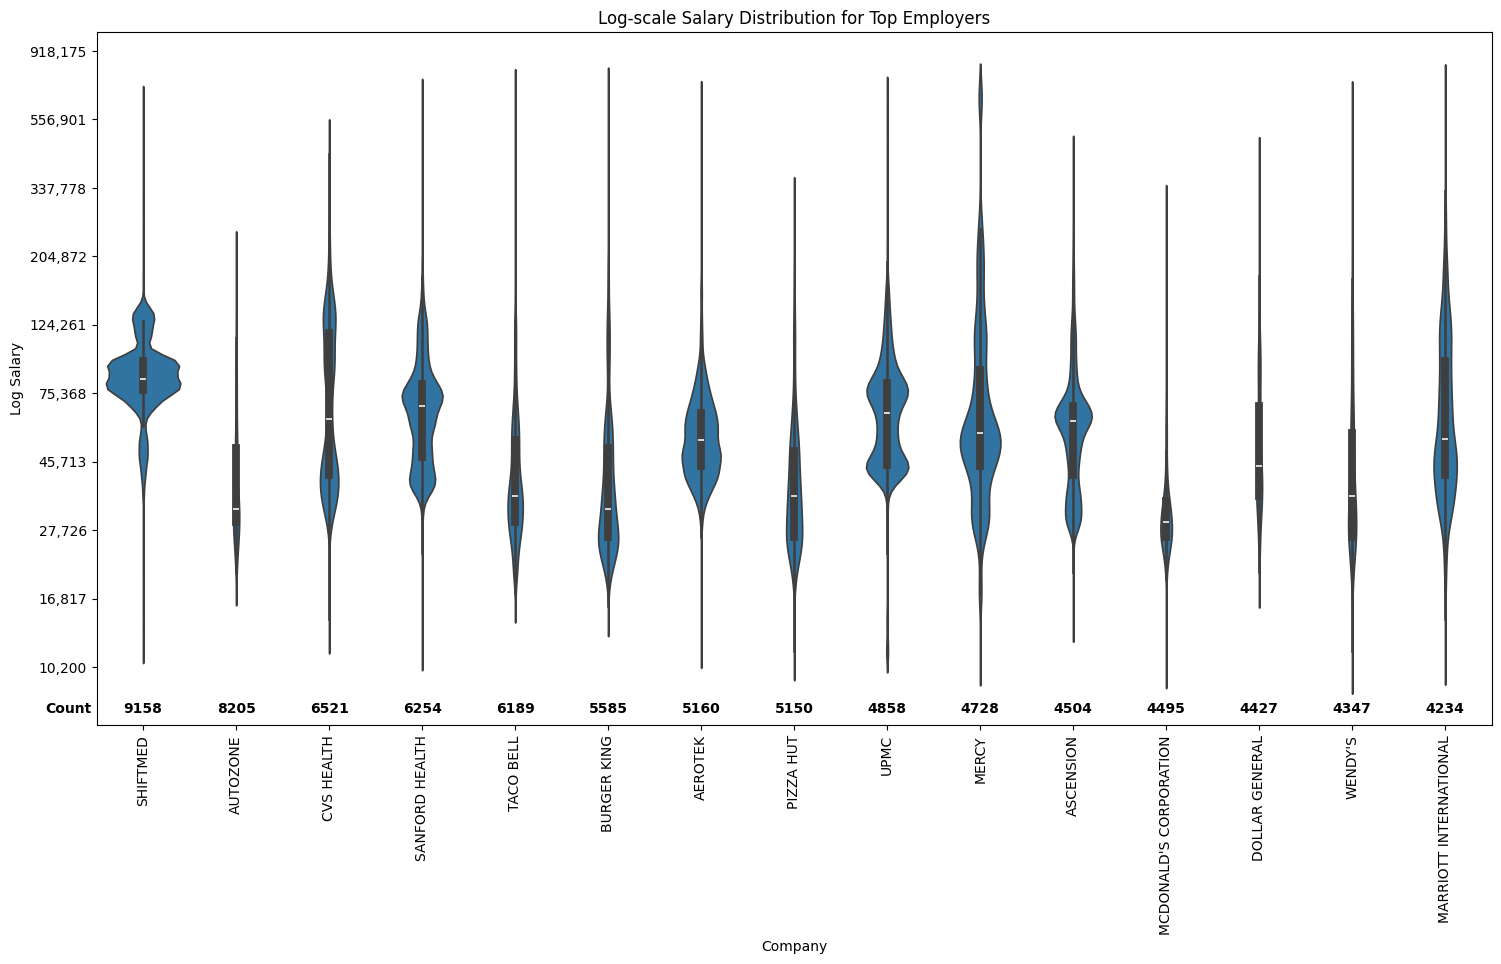

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['LOG_SALARY'] = df['SALARY'].apply(lambda x: np.log(x) if pd.notnull(x) and x > 0 else np.nan)
# Convert log salary y-ticks to regular numbers
top_employers = df['COMPANY_REF'].value_counts().head(16)
top_employers.drop('CONFIDENTIAL', inplace=True)

df['COMPANY_REF'] = pd.Categorical(df['COMPANY_REF'], categories=top_employers.index, ordered=True)

plt.figure(figsize=(18, 9))
sns.violinplot(x='COMPANY_REF', y='LOG_SALARY', data=df[df['COMPANY_REF'].isin(top_employers.index)],density_norm='count')
plt.xticks(rotation=90)

log_ticks = np.arange(df['LOG_SALARY'].min(), df['LOG_SALARY'].max(), 0.5)
regular_ticks = np.exp(log_ticks)
plt.yticks(log_ticks, [f'{tick:,.0f}' for tick in regular_ticks])

for employer, count in top_employers.items():
    plt.text(employer, 8.9, f'{count}', 
             horizontalalignment='center', size='medium', color='black', weight='semibold') #df[df['COMPANY_REF'] == employer]['LOG_SALARY'].median()
plt.text(-1.05, 8.9, 'Count', weight='semibold')

plt.title('Log-scale Salary Distribution for Top Employers')
plt.xlabel('Company')
plt.ylabel('Log Salary')
plt.show()
#print(top_employers)

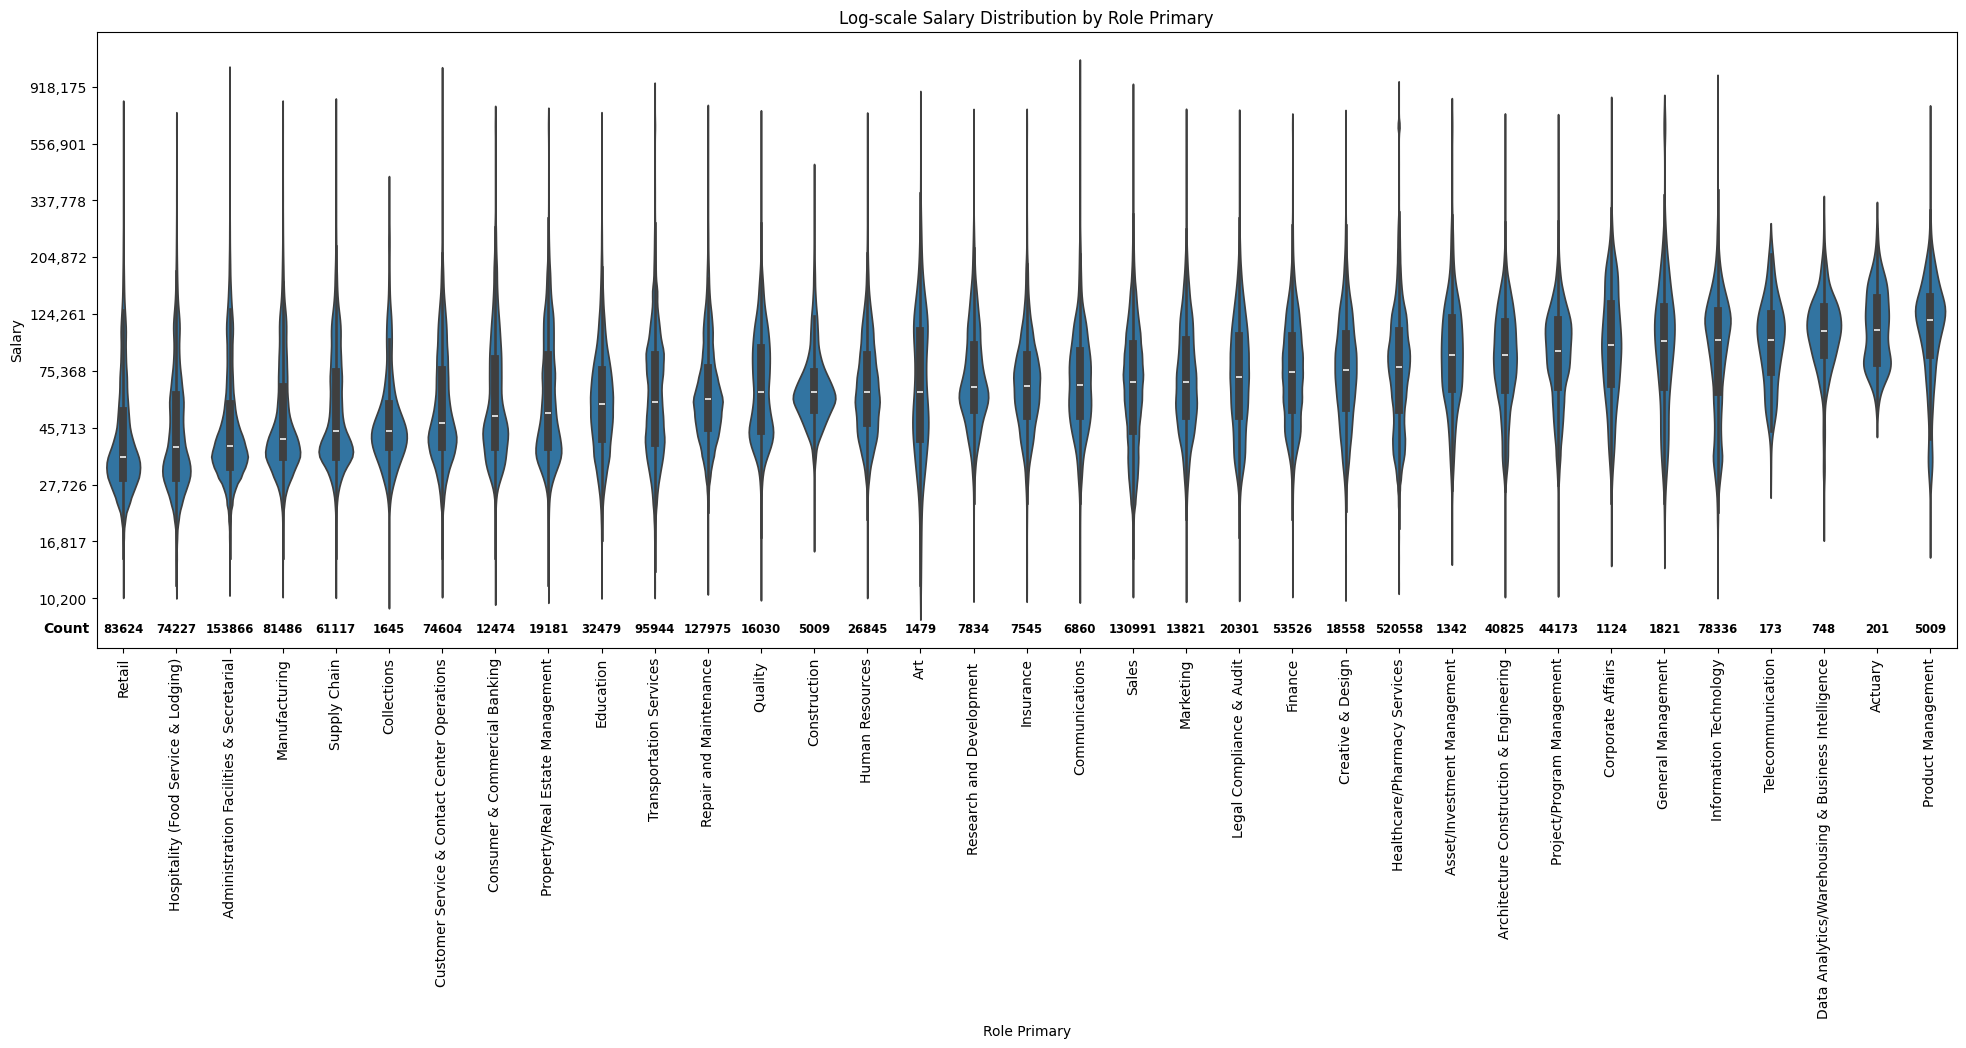

In [7]:

mean_salary_by_job_family = df.groupby('JOB_FAMILY')['SALARY'].median().sort_values()
sorted_job_families = mean_salary_by_job_family.index.tolist()
df['JOB_FAMILY'] = pd.Categorical(df['JOB_FAMILY'], categories=sorted_job_families, ordered=True)
plt.figure(figsize=(24, 8))
sns.violinplot(x='JOB_FAMILY', y='LOG_SALARY', data=df) #density_norm='count' DO NOT USE TILL DATA IS BALANCED, lots of medcare data
plt.xticks(rotation=90)

log_ticks = np.arange(df['LOG_SALARY'].min(), df['LOG_SALARY'].max(), 0.5)
regular_ticks = np.exp(log_ticks)
plt.yticks(log_ticks, [f'{tick:,.0f}' for tick in regular_ticks])

for job_family in sorted_job_families:
    count = df[df['JOB_FAMILY'] == job_family].shape[0]
    plt.text(sorted_job_families.index(job_family), df['LOG_SALARY'].min() - 0.3, str(count), 
             horizontalalignment='center', size='small', color='black', weight='semibold')

plt.text(-1.5, df['LOG_SALARY'].min() - 0.3, 'Count', weight='semibold')

plt.title('Log-scale Salary Distribution by Role Primary')
plt.xlabel('Role Primary')
plt.ylabel('Salary')
plt.show()

In [8]:
# states = gpd.read_file(shapefile_path)
# states

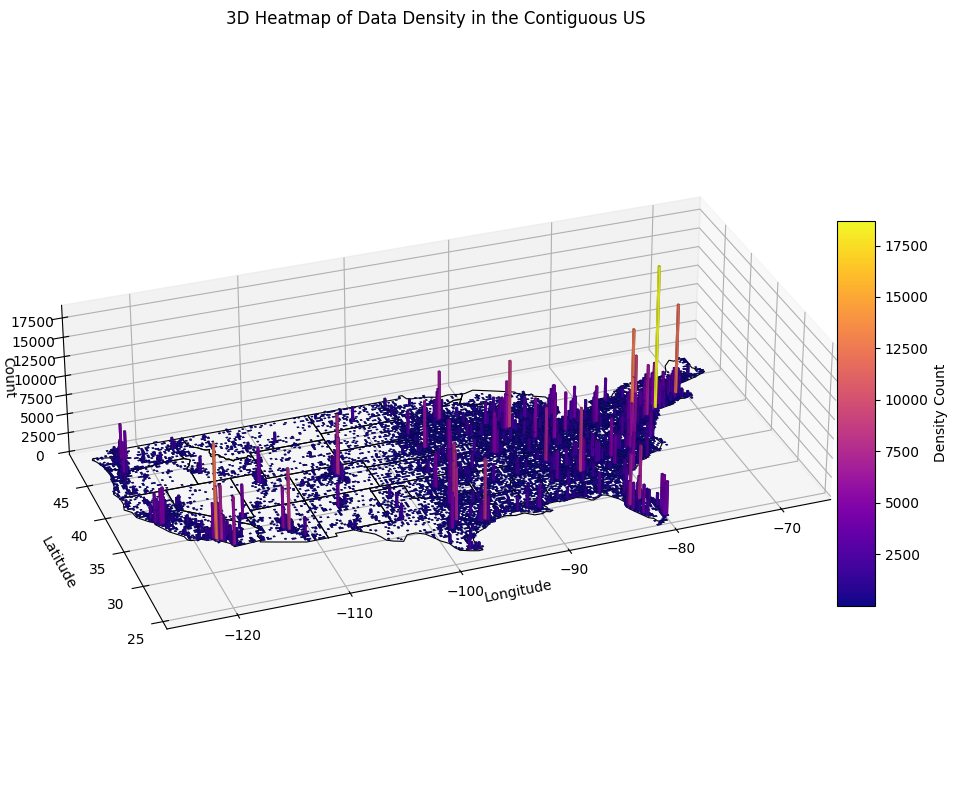

In [9]:
import pandas as pd
import matplotlib.colors as mcolors
import geopandas as gpd
from mpl_toolkits.mplot3d import Axes3D
# Path to the downloaded Natural Earth shapefile (update this to the correct path)
shapefile_path = "ne_110m_admin_1_states_provinces.shp"

# Define contiguous US bounding box
LAT_MIN, LAT_MAX = 24.5, 49.5
LON_MIN, LON_MAX = -125.0, -66.5

def plot_3d_heatmap(df, shapefile_path):
    # Load US state boundaries from Natural Earth data
    us_states = gpd.read_file(shapefile_path)

    # Define the bin size
    bin_size = 0.2
    lat_bins = np.arange(LAT_MIN, LAT_MAX + bin_size, bin_size)
    lon_bins = np.arange(LON_MIN, LON_MAX + bin_size, bin_size)

    # Binning the data
    hist, lat_edges, lon_edges = np.histogram2d(df['LATITUDE'], df['LONGITUDE'], bins=[lat_bins, lon_bins])

    # Convert bin edges to bin centers
    lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
    lon_centers = (lon_edges[:-1] + lon_edges[1:]) / 2
    lon_grid, lat_grid = np.meshgrid(lon_centers, lat_centers)

    # Flatten for 3D plotting
    x = lon_grid.ravel()
    y = lat_grid.ravel()
    z = hist.ravel()

    # Filter out empty bins
    mask = z > 0
    x, y, z = x[mask], y[mask], z[mask]

    # Create figure and 3D axis
    fig = plt.figure(figsize=(20, 10))  # Adjust figure size
    ax = fig.add_subplot(111, projection='3d')
    # Normalize the color mapping to z-values
    cmap = plt.cm.plasma  # Use a heatmap colormap
    norm = mcolors.Normalize(vmin=z.min(), vmax=z.max())  # Normalize based on min/max counts
    colors = cmap(norm(z))  # Convert z values to RGBA colors

    # Plot 3D bars with colors mapped to counts
    bars = ax.bar3d(x, y, np.zeros_like(z), bin_size, bin_size, z, shade=True, color=colors)

    # Set labels and title
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Count",labelpad=1)
    ax.set_xlim(LON_MIN, LON_MAX)
    ax.set_ylim(LAT_MIN, LAT_MAX)
    ax.set_title("3D Heatmap of Data Density in the Contiguous US",pad=-250)

    # Draw state boundaries on the XY plane
    for geom in us_states.geometry:
        if geom.geom_type == 'MultiPolygon':  # Handle multiple parts of a state
            for part in geom.geoms:
                x, y = part.exterior.xy
                ax.plot(x, y, zs=0, zdir='z', color='black', linewidth=0.8)
        else:
            x, y = geom.exterior.xy
            ax.plot(x, y, zs=0, zdir='z', color='black', linewidth=0.8)

    # Adjust the view angle
    ax.view_init(elev=30, azim=-110)

    # Fix the aspect ratio
    #aspect_ratio = (LON_MAX - LON_MIN) / (LAT_MAX - LAT_MIN)  # ≈ 2.34
    aspect_ratio=2#accept some distortion for better view
    ax.set_box_aspect([aspect_ratio, 1, 0.5])  # Scale (width, height, depth)

    # Add colorbar correctly
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Dummy array for colorbar
    cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=10, pad=0.01)
    cbar.set_label("Density Count")

    plt.show()

# Call function with your DataFrame and shapefile path
plot_3d_heatmap(df, shapefile_path)
